## 欠損値の補完　
- SimpleImputer

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# サンプルのデータセットを作成
df = pd.DataFrame(
    {
        "A": [1, np.nan, 3, 4, 5],
        "B": [6, 7, 8, np.nan, 10],
        "C": [11, 12, 13, 14, 15]
    }
)


# 平均値で欠損値を補完するインスタンスを作成する
imp = SimpleImputer(strategy="mean")
# 欠損値を補完
imp.fit(df)
imp.transform(df)

## カテゴリ変数のエンコーディング　
- LabelEncoder
- OneHotEncoder
- ColumnTransformer

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

df = pd.DataFrame(
    {
        "A": [1, 2, 3, 4, 5],
        "B": ["a", "b", "a", "b", "c"]
    }
)

# ラベルエンコーディング
# ラベルエンコーダのインスタンス化
le = LabelEncoder()
# 英語のa、b、cを1、2、3に変換
le.fit(df.loc[:, "B"])
le.transform(df.loc[:, "B"])

# One-hotエンコーディング
df_ohe = df.copy()
# ラベルエンコーダのインスタンス化
le = LabelEncoder()
# 英語のa、b、cを1、2、3に変換
df_ohe.loc[:, "B"] = le.fit_transform(df_ohe.loc[:, "B"])
# One-hotエンコーダのインスタンス化
ohe = ColumnTransformer([("OneHotEncoder",
                          OneHotEncoder(), [1])],
                          remainder = "passthrough")
# One-hotエンコーディング
df_ohe = ohe.fit_transform(df_ohe)
df_ohe

,A,B
0,1,a
1,2,b
2,3,a
3,4,b
4,5,c


## 特徴量の正規化
- StandardScaler
- MinMaxScaler


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# DataFrameを作成する
df = pd.DataFrame(
    {
        "A": [1, 2, 3, 4, 5],
        "B": [100, 200, 400, 500, 800]
    }
)
df

# 分散正規化のインスタンスを生成
stdsc = StandardScaler()
# 分散正規化を実行
stdsc.fit(df)
stdsc.transform(df)

# 最小最大正規化のインスタンスを生成
mmsc = MinMaxScaler()
# 最小最大正規化を実行
mmsc.fit(df)
mmsc.transform(df)

,A,B
0,1,100
1,2,200
2,3,400
3,4,500
4,5,800


# 分類
  

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Irisデータセットを読み込む
# 150個のデータのアヤメのがくや花びらの長さと幅のデータセット
iris = load_iris()
X, y = iris.data, iris.target

# 学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(
                    X, y, test_size=0.3, random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


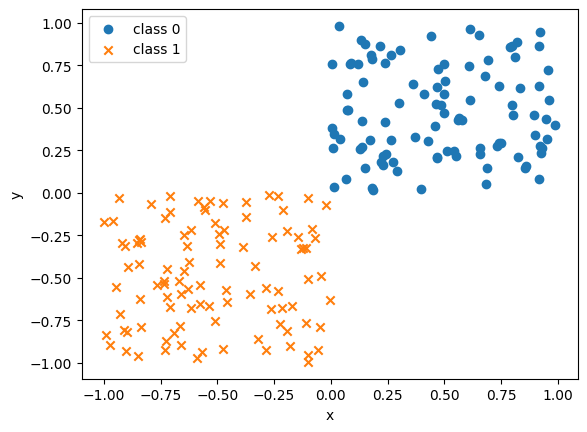

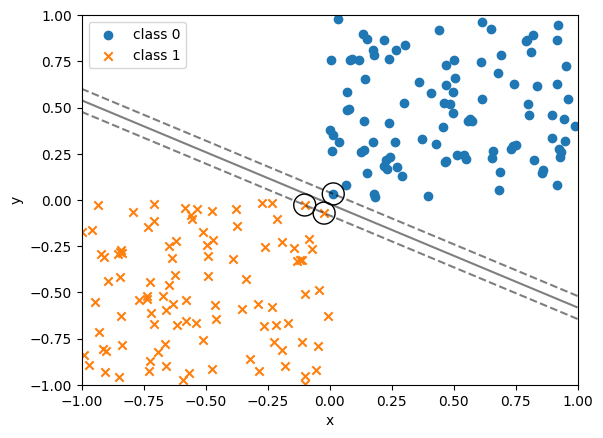

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# 乱数シードを固定
rng = np.random.default_rng(123)
# x軸y軸ともに0から1までの一様分布から100点をサンプリング
X0 = rng.uniform(size=(100, 2))
# クラス0のラベルを100個生成
y0 = np.repeat(0, 100)
# x軸y軸ともに-1から0までの一様分布から100点をサンプリング
X1 = rng.uniform(-1.0, 0.0, size=(100, 2))
# クラス1のラベルを100個生成
y1 = np.repeat(1, 100)
# 散布図にプロット
fig, ax = plt.subplots()
ax.scatter(X0[:, 0], X0[:, 1],
           marker="o", label="class 0")
ax.scatter(X1[:, 0], X1[:, 1],
           marker="x", label="class 1")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
plt.show()


# 学習，および決定境界，マージン，サポートベクタを可視化する関数
def plot_boundary_margin_sv(X0, y0, X1, y1, kernel, C,
                            xmin=-1, xmax=1, ymin=-1, ymax=1):
    # サポートベクタマシンのインスタンス化
    svc = SVC(kernel=kernel, C=C)
    # 学習
    svc.fit(np.vstack((X0, X1)), np.hstack((y0, y1)))
    
    fig, ax = plt.subplots()
    ax.scatter(X0[:, 0], X0[:, 1],
               marker="o", label="class 0")
    ax.scatter(X1[:, 0], X1[:, 1],
               marker="x", label="class 1")
    # 決定境界とマージンをプロット
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100),
                         np.linspace(ymin, ymax, 100))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    p = svc.decision_function(xy).reshape((100, 100))
    ax.contour(xx, yy, p, 
               colors="k", levels=[-1, 0, 1], 
               alpha=0.5, linestyles=["--", "-", "--"])
    # サポートベクタをプロット
    ax.scatter(svc.support_vectors_[:, 0],  
               svc.support_vectors_[:, 1], 
               s=250, facecolors="none",
               edgecolors="black")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend(loc="best")
    plt.show()

    # 決定境界、マージン、サポートベクタをプロット
    # 線形カーネル
    # Cを大きくするとマージンが小さくなる
plot_boundary_margin_sv(X0, y0, X1, y1,
                        kernel="linear", C=1e6)